In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import re
import nltk

In [2]:
df_eth = pd.read_csv('data_eth.csv')

## Ethereum

In [3]:
df_eth.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482837810096836610,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:58,NaN
1,1,1482837800705789952,b'RT @bigcats_nft: The Big Cats will produce a...,2022-01-16 22:10:56,NaN
2,2,1482837799518752768,b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...,2022-01-16 22:10:55,NaN
3,3,1482837791008567301,b'RT @jpatten__: Some of the @Treasure_DAO art...,2022-01-16 22:10:53,NaN
4,4,1482837787703394307,b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...,2022-01-16 22:10:53,NaN


In [4]:
mask = df_eth.duplicated(subset=['text'])
df_eth[mask]

,Unnamed: 0,id,text,datetime,Location
4,4,1482837787703394307,b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...,2022-01-16 22:10:53,NaN
7,7,1482837780707397633,b'RT @A_G_Eth: \xf0\x9f\x9b\xb8MEGA #NFTGiveaw...,2022-01-16 22:10:51,NaN
18,18,1482837767566635022,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:48,NaN
19,19,1482837758435639302,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:46,NaN
23,23,1482837743738802179,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:42,NaN
...,...,...,...,...,...
1991,1991,1482831087424487426,b'RT @SHEEPZYSNFT: MINT NOW: https://t.co/MN9X...,2022-01-16 21:44:15,NaN
1993,1993,1482831078238871557,"b""RT @SoulZ_NFT: We've Hit 3,000 Followers rea...",2022-01-16 21:44:13,NaN
1996,1996,1482831071095898112,"b'RT @isboredagain: I had a castle once, a bea...",2022-01-16 21:44:11,NaN
1998,1998,1482831067849580545,b'RT @MeidaZaliec: Probably nothing... \xf0\x9...,2022-01-16 21:44:10,NaN


In [5]:
df_eth = df_eth[~mask].reset_index(drop=True)
df_eth.shape

(1384, 5)

In [6]:
df_eth.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482837810096836610,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:58,NaN
1,1,1482837800705789952,b'RT @bigcats_nft: The Big Cats will produce a...,2022-01-16 22:10:56,NaN
2,2,1482837799518752768,b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...,2022-01-16 22:10:55,NaN
3,3,1482837791008567301,b'RT @jpatten__: Some of the @Treasure_DAO art...,2022-01-16 22:10:53,NaN
4,5,1482837786512486402,b'RT @A_G_Eth: \xf0\x9f\x9b\xb8MEGA #NFTGiveaw...,2022-01-16 22:10:52,NaN


In [7]:
df_eth_orig = df_eth.copy()

In [8]:
for tweet in df_eth['text'].sample(5).values:
    print(tweet)

b'An analysis published by Linkedin on January 13, 2021 shows that from 2020 to 2021, hiring with the terms "Bitcoin,\xe2\x80\xa6 https://t.co/VapC6q5A0v'
b'@NFTCompanyy Happy New Year \xf0\x9f\xa5\xb3. Needs some TLC look at this Beautiful unique Ape one of its kind.  Need a date whose\xe2\x80\xa6 https://t.co/C6wgwWM1i5'
b'https://t.co/8qpbg6477V\n#nft #ETH #Ethereum #crypto #bitcoin #nftart #Cryptos #NFTs #NFTartists #NFTdrop\xe2\x80\xa6 https://t.co/PFrhipdz12'
b'I\'ve just created "Sweet Stuff" collectible! https://t.co/bucaQ3Nx1W #rarible #ethereum #flow #nonfungible\xe2\x80\xa6 https://t.co/KknJiRUx1q'
b'RT @Coinmatik1: Ben pozisyonlar\xc4\xb1m\xc4\xb1n hepsini koruyorum ancak \xc3\xb6n\xc3\xbcm\xc3\xbczde ki hafta #FED toplant\xc4\xb1s\xc4\xb1na kadar piyasada ki karamsar hava devam edece\xe2\x80\xa6'


### Put all hashtags into a new column

In [9]:
df_eth['hashtag'] = df_eth['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_eth.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837810096836610,"b""RT @RTRcrypto: Let's go!\n\n@FEGtoken\n@life...",2022-01-16 22:10:58,NaN,"[SmartDeFi, Launchpad, BSCGem, FEG, trading, C..."
1,1,1482837800705789952,b'RT @bigcats_nft: The Big Cats will produce a...,2022-01-16 22:10:56,NaN,[]
2,2,1482837799518752768,b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...,2022-01-16 22:10:55,NaN,[]
3,3,1482837791008567301,b'RT @jpatten__: Some of the @Treasure_DAO art...,2022-01-16 22:10:53,NaN,[]
4,5,1482837786512486402,b'RT @A_G_Eth: \xf0\x9f\x9b\xb8MEGA #NFTGiveaw...,2022-01-16 22:10:52,NaN,[NFTGiveaway]


### Remove emojis

In [10]:
df_eth.text = df_eth.text.apply(lambda x: ' '.join([a for a in x.split() if '\\' not in a]))

In [11]:
test = df_eth.text
print(test)

0       b"RT @RTRcrypto: Let's #Launchpad #BSCGem #FEG...
1       b'RT @bigcats_nft: The Big Cats will produce a...
2       b'RT @GooniezNFT: Sneak Peek: Ethereum Halo Go...
3       b'RT @jpatten__: Some of the @Treasure_DAO art...
4       b'RT @A_G_Eth: #NFTGiveaway A.G.E NFT 100$ WL ...
                              ...                        
1379    b'@NFTlovinchic Book of Berlin #photographynft...
1380    b'Axelar is the universal interoperability pro...
1381    b'@Ralvero Smart Money going in @Zamo_Laws @De...
1382             b'@i_sunshine_9 https://t.co/uNFP01hWjK'
1383    b'@DrallNft Maybe some Ethereum will go along ...
Name: text, Length: 1384, dtype: object


In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_special_characters(text):
    text = re.sub("@\S+", "", text) #remove mentions
    text = re.sub("https?:\/\/.*[\r\n]*", "", text) #remove hyperlinks
    text = re.sub("#", "", text) #remove hashtag symbol
    text = re.sub('\w*\d\w*', ' ', text) #remove numbers
    text = re.sub("b'RT",'', text) #remove b'RT
    text = re.sub("b'",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [14]:
df_eth.text = df_eth.text.apply(remove_special_characters)

In [15]:
df_eth.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837810096836610,b RT Let s Launchpad BSCGem FEG trading Crypt...,2022-01-16 22:10:58,NaN,"[SmartDeFi, Launchpad, BSCGem, FEG, trading, C..."
1,1,1482837800705789952,The Big Cats will produce a unique NFT colle...,2022-01-16 22:10:56,NaN,[]
2,2,1482837799518752768,Sneak Peek Ethereum Halo Goon away whitel...,2022-01-16 22:10:55,NaN,[]
3,3,1482837791008567301,Some of the artists live in places where th...,2022-01-16 22:10:53,NaN,[]
4,5,1482837786512486402,NFTGiveaway A G E NFT WL of RT Follow,2022-01-16 22:10:52,NaN,[NFTGiveaway]


### Remove digits and lower the text

In [16]:
df_eth.text = df_eth.text.astype(str).str.replace('\d+', '')
df_eth.text = df_eth.text.str.lower()
df_eth.text.head()

/var/folders/bc/c9cbz3vx3k331bfmmjlgtbkm0000gn/T/ipykernel_17162/2147775759.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_eth.text = df_eth.text.astype(str).str.replace('\d+', '')


0    b rt  let s launchpad bscgem feg trading crypt...
1      the big cats will produce a unique nft colle...
2      sneak peek  ethereum halo goon away   whitel...
3      some of the  artists live in places where th...
4          nftgiveaway a g e nft    wl of rt follow   
Name: text, dtype: object

### Stemming text

In [17]:
from nltk.tokenize import TweetTokenizer

In [18]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()
def lemmatize_text(text):
    text = text.split(' ')
    for i, word in enumerate(text):
        text[i] = wnl.lemmatize(word)   #results for stemming is better lemmatization
        #text[i] = stemmer.stem(word)    
    return ' '.join(text)

In [19]:
df_eth.text = df_eth.text.apply(lemmatize_text)
df_eth.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837810096836610,b rt let s launchpad bscgem feg trading crypt...,2022-01-16 22:10:58,NaN,"[SmartDeFi, Launchpad, BSCGem, FEG, trading, C..."
1,1,1482837800705789952,the big cat will produce a unique nft collec...,2022-01-16 22:10:56,NaN,[]
2,2,1482837799518752768,sneak peek ethereum halo goon away whitel...,2022-01-16 22:10:55,NaN,[]
3,3,1482837791008567301,some of the artist live in place where thei...,2022-01-16 22:10:53,NaN,[]
4,5,1482837786512486402,nftgiveaway a g e nft wl of rt follow,2022-01-16 22:10:52,NaN,[NFTGiveaway]


### Check if there is non-enlighs words and remove them

In [20]:
test = df_eth.text
test

0       b rt  let s launchpad bscgem feg trading crypt...
1         the big cat will produce a unique nft collec...
2         sneak peek  ethereum halo goon away   whitel...
3         some of the  artist live in place where thei...
4             nftgiveaway a g e nft    wl of rt follow   
                              ...                        
1379     book of berlin photographynft series on sale ...
1380    axelar is the universal interoperability proto...
1381         smart money going in       nft nftcommunity 
1382                                                     
1383            maybe some ethereum will go along way for
Name: text, Length: 1384, dtype: object

In [21]:
import nltk
words = set(nltk.corpus.words.words())
keep_words = ['bitcoin', 'ethereum', 'binance','tether','solana','nft']

def keep_eng(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w in words or not w.isalpha() or w in keep_words))

In [22]:
df_eth.text = df_eth.text.apply(keep_eng)
print(df_eth.text)

0                                         b let s trading
1       the big cat will produce a unique nft collecti...
2       sneak peek ethereum halo goon away spot on thi...
3       some of the artist live in place where their f...
4                                     a g e nft of follow
                              ...                        
1379               book of berlin series on sale ethereum
1380    is the universal protocol and infrastructure a...
1381                             smart money going in nft
1382                                                     
1383            maybe some ethereum will go along way for
Name: text, Length: 1384, dtype: object


### Remove rows containing empty tweets

In [23]:
print(f" There are {np.sum(df_eth.text == '')} rows that now have empty tweets.")

 There are 183 rows that now have empty tweets.


In [24]:
mask = df_eth.text == ''
df_eth[mask]

,Unnamed: 0,id,text,datetime,Location,hashtag
5,6,1482837783211302923,,2022-01-16 22:10:51,NaN,[NFTGiveaway]
10,12,1482837772251635717,,2022-01-16 22:10:49,NaN,[]
37,44,1482837673681248263,,2022-01-16 22:10:25,NaN,"[btc, Ethereum, bnb, bsc, Binance, NFT, cheems..."
38,45,1482837670317412357,,2022-01-16 22:10:25,NaN,[]
39,46,1482837662784499715,,2022-01-16 22:10:23,NaN,"[ElonMusk, BabyDoge, BabyDogeCoin, BabyDogeArm..."
...,...,...,...,...,...,...
1317,1902,1482831398260072449,,2022-01-16 21:45:29,NaN,"[SHINJA, SHIBNOBI, KUSARIBLOCKCHAIN, FULLYDOXX..."
1359,1964,1482831175370649607,,2022-01-16 21:44:36,NaN,"[current, price, ETH, Ethereum, airdrop]"
1366,1975,1482831127584854020,,2022-01-16 21:44:25,NaN,[]
1375,1986,1482831091270619141,,2022-01-16 21:44:16,NaN,"[BabyDoge, BabyDogeArmy, ElonMusk, BabyDoge, B..."


In [25]:
df_eth = df_eth[~mask]
df_eth.shape

(1201, 6)

### Tokenize the document

In [26]:
stop_words = nltk.corpus.stopwords.words('english')

In [27]:
## CountVectorize
cvec = CountVectorizer(stop_words=stop_words, max_df=7, min_df=3)
doc_word_cv = cvec.fit_transform(df_eth.text)
pd.DataFrame(doc_word_cv.toarray(), index=df_eth.text, columns=cvec.get_feature_names()).head(10)

,abstract,account,active,activity,actually,add,ago,almost,already,always,...,well,whale,white,win,without,working,worth,wrong,yes,yield
text,,,,,,,,,,,,,,,,,,,,,
b let s trading,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the big cat will produce a unique nft collection on the ethereum of the big cat have been made,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sneak peek ethereum halo goon away spot on this follow like,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
some of the artist live in place where their friend mint their free mint without blowing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
a g e nft of follow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
to giving away nft follow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
club hand nft art artist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ethereum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
market gain close to in hour value jump token see triple digit gain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
##TFIDF
cv_tfidf = TfidfVectorizer(stop_words=stop_words,max_df =0.7, min_df=3)
doc_word_tfidf = cv_tfidf.fit_transform(df_eth.text)
pd.DataFrame(doc_word_tfidf.toarray(), index=df_eth.text, columns=cv_tfidf.get_feature_names()).head(10)

,abstract,account,active,activity,actually,add,address,ago,airdrop,alien,...,work,working,world,worth,would,wrong,year,yes,yet,yield
text,,,,,,,,,,,,,,,,,,,,,
b let s trading,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the big cat will produce a unique nft collection on the ethereum of the big cat have been made,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sneak peek ethereum halo goon away spot on this follow like,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
some of the artist live in place where their friend mint their free mint without blowing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a g e nft of follow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to giving away nft follow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
club hand nft art artist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ethereum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
market gain close to in hour value jump token see triple digit gain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
doc_word_tfidf.shape

(1201, 417)

In [30]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF Model

In [31]:
from sklearn.decomposition import NMF, TruncatedSVD

In [32]:
n_topics=10
nmf = NMF(n_components=n_topics)
doc_topic=nmf.fit_transform(doc_word_tfidf)

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [33]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_word

,abstract,account,active,activity,actually,add,address,ago,airdrop,alien,...,work,working,world,worth,would,wrong,year,yes,yet,yield
component_1,0.000,0.005,0.011,0.000,0.000,0.001,0.026,0.010,0.000,0.000,...,0.018,0.003,0.000,0.016,0.010,0.000,0.010,0.009,0.009,0.000
component_2,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.007,0.002,0.807,0.000,0.000,0.000,0.000,0.007,0.889,0.000
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.007,0.000,0.000,0.019,0.011,0.028,0.157,0.000,0.000,0.000,...,0.001,0.000,0.000,0.024,0.002,0.000,0.000,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.015,0.013,0.001,0.000,0.000,0.000,0.011
component_7,0.005,0.049,0.000,0.004,0.000,0.005,0.002,0.017,1.104,0.000,...,0.013,0.000,0.762,0.000,0.001,0.000,0.051,0.025,0.000,0.000
component_8,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,1.293,...,0.010,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000
component_9,0.000,0.022,0.010,0.000,0.000,0.015,0.005,0.000,0.000,0.000,...,0.000,0.016,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.012
component_10,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.001


In [34]:
display_topics(nmf, cv_tfidf.get_feature_names(), 10)


Topic  0
ethereum, network, price, buy, gas, solana, faucet, test, fund, binance

Topic  1
eye, yet, dream, find, ha, world, discovered, art, edit, stillness

Topic  2
check, rare, amazing, nft, listing, project, sir, enter, winner, free

Topic  3
collectible, eye, angel, ley, oriental, dance, series, de, going, chain

Topic  4
nft, collection, follow, drop, purchase, discover, may, address, randomly, get

Topic  5
bitcoin, binance, price, cash, bet, coin, money, para, gain, en

Topic  6
airdrop, free, coin, new, world, giveaway, get, one, follow, need

Topic  7
available, art, alien, nft, artist, sold, club, term, real, wa

Topic  8
go, way, along, maybe, ethereum, home, let, big, time, join

Topic  9
found, look, stillness, gun, girl, eye, share, need, network, token


In [35]:
## among all the topics, topic 9 contains a lot of unexplainanle words
## We need to inspect each topic to better under the content

In [36]:
print(doc_topic[0])

[0.00118557 0.         0.00098145 0.         0.00092402 0.00185955
 0.00556928 0.         0.00772191 0.00019928]


In [37]:
df_eth.text.iloc[0]

'b let s trading'

In [38]:
df_eth['argmax_topic']=np.argmax(doc_topic, axis=1)
df_eth.argmax_topic.head(10)

0     8
1     4
2     0
3     6
4     4
6     4
7     7
8     0
9     5
11    0
Name: argmax_topic, dtype: int64

In [39]:
pd.Series(df_eth.argmax_topic).value_counts()

0    302
4    240
6    172
5    136
1     77
9     71
2     62
3     54
7     45
8     42
Name: argmax_topic, dtype: int64

In [40]:
###########
# Topic 0 #  ### Ethereum Network, how other crytos are affected 
###########

In [122]:
df_eth_0=df_eth[df_eth.argmax_topic==0]
df_eth_0.text.iloc[190:200]

842    ethereum layer two developer valued at followi...
843    is that true that seek to integrate the applic...
850                                  good night ethereum
861               do you believe ethereum will flip sure
864    model or in ethereum like minimum doe to parti...
865                                          de ethereum
872    b we all know tron network is ethereum tron s ...
885    poll for ethereum community you wake up in and...
887              current price of ethereum change volume
901    b dao is coming a start for our digital countr...
Name: text, dtype: object

In [108]:
df_eth_orig.text.iloc[11]

"b'Requesting faucet funds into 0x5bEbF71Da5172229A2162d0548466e76123bDa81 on the #Rinkeby #Ethereum test network.'"

In [117]:
df_eth_orig.text.iloc[358]

"b'RT @laurashin: Lightning has much less total value locked ($165 million) than big Ethereum-based DeFi protocols (billion of $). @RyanTheGen\\xe2\\x80\\xa6'"

In [118]:
df_eth_orig.text.iloc[539]

"b'RT @intocryptoverse: If you cannot mentally navigate #Bitcoin\\xe2\\x80\\x99s range between $30k-$60k (with short and slight deviations outside of it) or\\xe2\\x80\\xa6'"

In [121]:
df_eth_orig.text.iloc[978]

"b'$BNB #BNB #BinanceSmartChain \\n\\nRespect the BNB and never doubt it.\\nAs much of a competitor to the \\xf0\\x9f\\x91\\x91  as #Ethereum.'"

In [124]:
df_eth_orig.text.iloc[872]

'b"@BTCTN We all know Tron network is Ethereum 2.0. #Tron\'s development team has already made the Super Representative\\xe2\\x80\\xa6 https://t.co/I8oQ4lRlWM"'

In [47]:
###########
# Topic 1 #  ### Robot accounts to promote NFTs
###########

In [130]:
df_eth_1=df_eth[df_eth.argmax_topic==1]
df_eth_1.text.iloc[40:60]

544    find your dream in eye eye are a world that ha...
554    find your dream in eye eye are a world that ha...
560    find your dream in eye eye are a world that ha...
568    find your dream in eye eye are a world that ha...
578    find your dream in eye eye are a world that ha...
584    the smart contract of effect is anti whale eff...
586    find your dream in eye eye are a world that ha...
600    find your dream in eye eye are a world that ha...
608    find your dream in eye eye are a world that ha...
626    find your dream in eye eye are a world that ha...
643    find your dream in eye eye are a world that ha...
650    find your dream in eye eye are a world that ha...
656    find your dream in eye eye are a world that ha...
661    find your dream in eye eye are a world that ha...
670    find your dream in eye eye are a world that ha...
698    find your dream in eye eye are a world that ha...
700    today i want to present you to he ha a white i...
714    find your dream in eye e

In [126]:
df_eth_orig.text.iloc[75]

"b'RT @MetawarOfficial: Less than 2 days after Metawar launch, Metawar chat - 1 has reached 200,000 users, it is full, so fast\\xf0\\x9f\\xa5\\xb0\\n\\n#Binance #Bit\\xe2\\x80\\xa6'"

In [128]:
df_eth_orig.text.iloc[289]

'b\'@DeanSteinerNFT " Find your dreams in eyes " Eyes are a world that has not yet been discovered #art #pixelart #edit\\xe2\\x80\\xa6 https://t.co/8qxX1xRxBz\''

In [131]:
df_eth_orig.text.iloc[289]

'b\'@DeanSteinerNFT " Find your dreams in eyes " Eyes are a world that has not yet been discovered #art #pixelart #edit\\xe2\\x80\\xa6 https://t.co/8qxX1xRxBz\''

In [134]:
df_eth_orig.text.iloc[700]

"b'RT @TaleteDiNerete: Today I want to present you to \\xe3\\x81\\x91\\xe3\\x81\\x84, he has a White Maneki-neko.\\n\\nHe is the Squeerkat #777 and now is on sale on OpenSea\\xe2\\x80\\xa6'"

In [54]:
###########
# Topic 2 #  #### Promote NFT
###########

In [138]:
df_eth_2=df_eth[df_eth.argmax_topic==2]
df_eth_2.text.iloc[21:40]

503                     check this amazing nft it a rare
506                     check this amazing nft it a rare
518                     check this amazing nft it a rare
566                 check out my nft listing on ethereum
572    is not total score can check by the effect con...
649                     check this amazing nft it a rare
657                     check this amazing nft it a rare
662                     check this amazing nft it a rare
673                     check this amazing nft it a rare
678                     check this amazing nft it a rare
680    ethereum is my second biggest holding i believ...
702                     check this amazing nft it a rare
710                     check this amazing nft it a rare
717    check out my photography project on still in t...
724              you can now have free check out you are
750       you can now have free check out the man who ha
764                                   check you ethereum
783                            

In [135]:
df_eth_orig.text.iloc[54]

"b'@psikoape Check this amazing Ape\\xf0\\x9f\\xa6\\x8d NFT \\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d Its a Rare Nft..\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\nhttps://t.co/fIMVmDiazX \\n#nft #nftart #nftartist\\xe2\\x80\\xa6 https://t.co/I7mqSogFOh'"

In [136]:
df_eth_orig.text.iloc[111]

"b'RT @FTeller420: The community over @Cool_Dogs_ has been amazing and it seems that someone has been coming through to sweep up that floor!\\xf0\\x9f\\x91\\x80\\xe2\\x80\\xa6'"

In [137]:
df_eth_orig.text.iloc[277]

"b'RT @NFTLEMON_: \\xf0\\x9f\\x8e\\x8a #NFTGiveaway \\xf0\\x9f\\x8e\\x8a\\n\\n\\xf0\\x9f\\x8e\\x81A lucky winner will get a WL for this amazing project \\xf0\\x9f\\x8c\\x88\\xf0\\x9f\\x90\\xb5\\n\\nStay tuned\\n\\nTo Enter:\\n\\n1\\xef\\xb8\\x8f\\xe2\\x83\\xa3Follow @ApeDoods &amp; @N\\xe2\\x80\\xa6'"

In [139]:
df_eth_orig.text.iloc[680]

"b'RT @TheCryptoLark: #ethereum is my second biggest #crypto holding. I believe the team is going to deliver something really amazing for ETH\\xe2\\x80\\xa6'"

In [59]:
###########
# Topic 3 #  #### Almost all include #Rarible and #NFT, so we can assume that topic 3 is about selling NFTs in Rarible
###########

In [60]:
df_eth_3=df_eth[df_eth.argmax_topic==3]
df_eth_3.text.iloc[0:30]

44                         just evening flow collectible
64                               just ley de collectible
106    the mask maniac club is a collection of unique...
130                          just lovely boy collectible
182                                     just collectible
198    mint now alpha and omega of one of the first d...
260                                     just collectible
304                                 just eye collectible
380                                     just collectible
389                              time string and the ley
405                                 just eye collectible
447                                 just eye collectible
490                                     just collectible
515    hello are making collectible and half of the p...
585                                 going ham riser rise
595                                     just collectible
664    i think you have really discovered just i thin...
669        just omega collectib

In [140]:
df_eth_orig.text.iloc[44]

'b\'I\\\'ve just created ""Evening Flow"" collectible! https://t.co/BXU3olkuna #rarible #ethereum #flow #nonfungible\\xe2\\x80\\xa6 https://t.co/0CMvZ6Trce\''

In [141]:
df_eth_orig.text.iloc[380]

'b\'I\\\'ve just created "Shiva" collectible! https://t.co/Q24fbeTy4a #rarible #ethereum  #NFTCommunity #nftart #NFTs\\xc2\\xa0\\xe2\\x80\\xa6 https://t.co/Va8EXLktOq\''

In [142]:
df_eth_orig.text.iloc[913]

'b\'"The Angel of Wisdom" collectible! https://t.co/490VdJvjZy #rarible #ethereum #flow #nonfungible #NFTCommunity\\xe2\\x80\\xa6 https://t.co/rFpgUgZl18\''

In [64]:
###########
# Topic 4 #  ### NFT
###########

In [65]:
df_eth_4=df_eth[df_eth.argmax_topic==4]
df_eth_4.text.iloc[0:20]

1     the big cat will produce a unique nft collecti...
4                                   a g e nft of follow
6                             to giving away nft follow
17                          discover the collection nft
18               lucky winner will get a their and stay
19    to win you need friend winner nft winner luck ...
20                                           polygon de
23                      drop your activity extra follow
26                                   follow like tag on
30                          discover the collection nft
35    service are unlocking innovative nft use case ...
36                                             away nft
47    winner will receive a another undead pastel nf...
48                          discover the collection nft
52    more than just a game of play for fun or play ...
58    making it too easy may actually bring security...
61    this is my gift to you that support me every d...
63    so many going on at the same winner will b

In [143]:
df_eth_orig.text.iloc[1]

"b'RT @bigcats_nft: The Big Cats will produce a unique NFT collection on the Ethereum Blockchain.\\n\\nAll of the Big Cats NFTs have been made by\\xe2\\x80\\xa6'"

In [144]:
df_eth_orig.text.iloc[58]

"b'@iamDCinvestor @ethereum Making it too easy may actually bring less security and more centralization to the network\\xe2\\x80\\xa6 https://t.co/K9PYjcl9lq'"

In [68]:
df_eth_orig.text.iloc[558]

"b'Hany Mukhtar bought for 0.465 ETH (1549.32$) on the secondary market \\n\\nSeason: 2021-2022\\nLevel: 7\\nSerial: 8/100\\nPri\\xe2\\x80\\xa6 https://t.co/6sJ3zTYtJM'"

In [69]:
###########
# Topic 5 #   ###More intellectual thinkings about Eth and other cryptos
###########

In [148]:
df_eth_5=df_eth[df_eth.argmax_topic==5]
df_eth_5.text.iloc[110:130]

1094    swipe and lead higher after bitcoin hit ethere...
1097                            bitcoin ethereum ethereum
1098    incredible to see baby saying he want to hold ...
1122     price today market dip marginally even a bitcoin
1130    b apparently and enable bitcoin on ethereum ca...
1147    b bitcoin and are useless and pointless for th...
1156       person who and me will win a nft worth bitcoin
1157                                  bitcoin price slide
1160    if got a dream chase it because the dream chas...
1188                                     bitcoin ethereum
1204                                  gas price fast slow
1205       ethereum i expect serious rise in bitcoin dodo
1224                                  bitcoin ethereum bu
1226                       bitcoin is ethereum is are dum
1281                  is about to go parabolic in bitcoin
1288                      bitcoin price price price price
1295    banning bitcoin or ethereum security could be ...
1301          

In [71]:
df_eth_orig.text.iloc[55]

"b'4chan /biz/ coin mentions (past hour)\\n\\n#1\\xf0\\x9f\\xa5\\x87 Bitcoin: 30 (-3)\\n#2\\xf0\\x9f\\xa5\\x88 Ethereum: 15 (-3)\\n#3\\xf0\\x9f\\xa5\\x89 Fantom: 14 (-1)\\n#4 Chainlink:\\xe2\\x80\\xa6 https://t.co/w4wLpQkeaE'"

In [72]:
df_eth_orig.text.iloc[274]

"b'RT @AkitaAlliance: The wait is almost Over. We are FAMILY and we deserve This!\\n#AKITA #AKITA_NETWORK #AVAX #Ethereum \\n@essojayofficial @Mac\\xe2\\x80\\xa6'"

In [146]:
df_eth_orig.text.iloc[1071]

'b"RT @CardanoConvo: It is about time that #Cardano gets the recognition that it deserves! It\'s been a better bet for multiple years!\\xf0\\x9f\\x98\\x84\\n\\nhttps:\\xe2\\x80\\xa6"'

In [149]:
df_eth_orig.text.iloc[1122]

"b'Crypto Prices Today: Market dips marginally even as Bitcoin, Ethereum\\xc2\\xa0dip https://t.co/f3BeUXhV60'"

In [75]:
###########
# Topic 6 #  ### A guy called Richard Heart(PulseX.com) posting about his Youtube Live event 
###########  ### talks how cryto change the future lives and financial system

In [162]:
df_eth_6=df_eth[df_eth.argmax_topic==6]
df_eth_6.text.iloc[80:100]

647    the by rarity is live official project for mon...
667             game and more coming this highly engaged
676                bought for by n on the primary market
685              market watch coin with massive ethereum
686      b trade with value your love trading our family
687             game and more coming this highly engaged
688      b trade with value your love trading our family
695    new user will enter the space through without ...
699                   free money yes please the standard
718    will completely change the rule of the game in...
723                                      hi happy day on
727    will completely change the rule of the game in...
739    will completely change the rule of the game in...
742                   bought for on the secondary market
746    much more convenient for u increase adoption a...
767    win free cash with entrepreneurial leadership ...
774    hex is already doing what is trying to do with...
778    the reason why i decided

In [150]:
df_eth_orig.text.iloc[3]

"b'RT @jpatten__: Some of the @Treasure_DAO artists live in places where their friends can\\xe2\\x80\\x99t mint their NFTs (free mints!) without blowing wee\\xe2\\x80\\xa6'"

In [153]:
df_eth_orig.text.iloc[57]

"b'Senator Cynthia Lummis backs crypto for US retirement plans\\n#ethereum #trading #litecoin #coinbase\\nhttps://t.co/XUUYVSquG3'"

In [159]:
df_eth_orig.text.iloc[458]

"b'\\xe2\\x9a\\xa0\\xef\\xb8\\x8fURGENT ETHEREUM FREE AIRDROP &amp; NEW COIN $1B WORLDS LARGEST! 5% INCREAS... https://t.co/58K64AZjDc via @YouTube'"

In [163]:
df_eth_orig.text.iloc[695]

"b'RT @NarbTrading: New users will enter the space through @0xPolygon without even knowing they\\xe2\\x80\\x99re using Ethereum.\\n\\nFurther in the future, new\\xe2\\x80\\xa6'"

In [81]:
###########
# Topic 7 #  ### Annoucement of a new NFT collection & The impact and power of Ethereum network
###########

In [168]:
df_eth_7=df_eth[df_eth.argmax_topic==7]
df_eth_7.text.iloc[20:40]

548                       alien available now on nft art
561                          poetry art or grid ethereum
563                       alien available now on nft art
564                              nft art artist ethereum
576                       alien available now on nft art
593                       alien available now on nft art
613                       alien available now on nft art
638    edition republican nft now available limited s...
645                       alien available now on nft art
660                       alien available now on nft art
691                       alien available now on nft art
711                       alien available now on nft art
713    my available work world the power of ethereum ...
722                       alien available now on nft art
725    daily doodle is available now doodle are on et...
733                       alien available now on nft art
737                         sold nft art artist ethereum
756                            

In [165]:
df_eth_orig.text.iloc[27]

'b"RT @pseudotheos: Ethereum has become the intersection of tech, culture, finance, and art. \\n\\nCan\'t wait to see what this becomes 10 years fr\\xe2\\x80\\xa6"'

In [166]:
df_eth_orig.text.iloc[278]

'b\'An analysis published by Linkedin on January 13, 2021 shows that from 2020 to 2021, hiring with the terms "Bitcoin,\\xe2\\x80\\xa6 https://t.co/VapC6q5A0v\''

In [167]:
df_eth_orig.text.iloc[528]

"b'Alien #77 available Now on @opensea \\xf0\\x9f\\x91\\xbd\\n\\n#nftart #nft #nftartist #art #digitalart #nftcommunity #nfts #cryptoart\\xe2\\x80\\xa6 https://t.co/xhXr3BEMZQ'"

In [169]:
df_eth_orig.text.iloc[713]

"b'RT @DoubleSart: My Available work \\xf0\\x9f\\x94\\xa5\\n\\nETHEREUM WORLD // 0.3 $ETH\\nWith the greatest power of Ethereum, all creatures are hunting for it.\\n\\nhtt\\xe2\\x80\\xa6'"

In [87]:
###########
# Topic 8 #  #### Random
###########

In [175]:
df_eth_8=df_eth[df_eth.argmax_topic==8]
df_eth_8.text.iloc[20:40]

846     can you do with your one way is to stake them ...
886     is the go to oracle is the key to the working ...
897                            go big or go home ethereum
900                                                    go
1083                       b finally a wait too much only
1186                     my for ethereum go vulnerability
1195            maybe some ethereum will go along way for
1200            maybe some ethereum will go along way for
1207            maybe some ethereum will go along way for
1211            maybe some ethereum will go along way for
1219            maybe some ethereum will go along way for
1225            maybe some ethereum will go along way for
1234            maybe some ethereum will go along way for
1242            maybe some ethereum will go along way for
1247            maybe some ethereum will go along way for
1251            maybe some ethereum will go along way for
1255    then let me one more good is a node a a servic...
1276          

In [171]:
df_eth_orig.text.iloc[35]

"b'RT @chainlink: Chainlink decentralized services are unlocking innovative #NFT use cases across gaming, DeFi, and beyond.\\n\\nExplore today\\xe2\\x80\\x99s i\\xe2\\x80\\xa6'"

In [172]:
df_eth_orig.text.iloc[364]

"b'RT @iamDCinvestor: Ethereum staking UX is still WAY too hard 1+ year later, and even experienced users are reticent to change clients\\n\\ni wo\\xe2\\x80\\xa6'"

In [176]:
df_eth_orig.text.iloc[1195]

"b'@blocka84 @mongs_nft @mongoosecoineth Maybe some Ethereum will go along way for college.\\n\\n0xFbE6A589fDAEf5b5019520195EA0cD5F533c9aA5'"

In [185]:
###########
# Topic 9 #  ### NFTs
###########

In [183]:
df_eth_9=df_eth[df_eth.argmax_topic==9]
df_eth_9.text.iloc[20:40]

908     happy new year need some look at this beautifu...
917     happy new year need some look at this beautifu...
922                look what i found gun girl collectible
929     happy new year need some look at this beautifu...
947             look what i found night angel collectible
959                look what i found gun girl collectible
960             look what i found night angel collectible
974     cannot wait is all the piece together the rema...
976     cannot wait for this is all the piece together...
996     happy new year need some look at this beautifu...
1016    happy new year need some look at this beautifu...
1022                                 ethereum share found
1024               look what i found gun girl collectible
1030                                 ethereum share found
1037           look what i found resurrection collectible
1044                                 ethereum share found
1045                    look what i found hen collectible
1061          

In [178]:
df_eth_orig.text.iloc[59]

"b'Continuing our research on $UNO\\xf0\\x9f\\x94\\x8e\\xf0\\x9f\\x94\\x8e \\n\\nAs we dig deeper, It looks more solid. I advise always DYOR before you buy some\\xe2\\x80\\xa6 https://t.co/SdkHmLzNao'"

In [180]:
df_eth_orig.text.iloc[338]

"b'Taking care of our holders! Literally one week and look at how much has come back to the holders!! \\xf0\\x9f\\xa4\\xaf\\xf0\\x9f\\xa4\\xaf #Ethereum\\xe2\\x80\\xa6 https://t.co/yHpnREIXii'"

In [181]:
df_eth_orig.text.iloc[818]

"b'@NFTscollector1 Happy New Year \\xf0\\x9f\\xa5\\xb3. Needs some TLC look at this Beautiful unique Ape one of its kind.  Need a date wh\\xe2\\x80\\xa6 https://t.co/2wuKXFL3U8'"

In [184]:
df_eth_orig.text.iloc[922]

"b'RT @Richy_Beats: @DymarczykAutym Look what I found! Gun Girl 5  collectible https://t.co/o0yCdMFnlH #rarible #ethereum #flow #nonfungible #\\xe2\\x80\\xa6'"

In [ ]:
#### In general, twitters about Ethereum is more random than Bitcoin, possibly because Eth is faster and cheaper
#### and a lot of other cryto database is actually based on Eth

### CorEx Model

In [98]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
words = list(np.asarray(cvec.get_feature_names()))
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word_cv, words=words)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: per,data,tell,piece,bullish,trade,thanks,cannot,true,take
1: people,proof,white,worth,making,asset,rule,chance,payment,present
2: hey,exchange,video,create,secure,locked,sign,always,billion,doge
3: fast,version,welcome,holder,thank,support,slow,care,gift,taking
4: flow,sir,dance,oriental,yes,collectable,nonfungible,success,account,long
5: key,gaming,heart,use,avalanche,thing,might,anyone,history,excited
6: soon,sold,listed,near,win,cash,since,bear,min,prediction
7: night,angel,late,update,stay,dao,profile,genesis,spot,safe
8: lot,great,stake,home,mining,activity,earn,name,creature,said
9: rise,classic,discord,let,got,date,even,actually,cat,face


### K-Means Clustering

In [100]:
from sklearn.cluster import KMeans

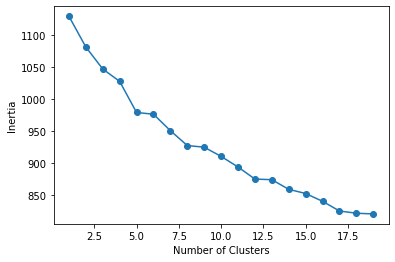

In [101]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=200, n_init=10)
    km.fit(doc_word_tfidf)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');